In [94]:
import pandas as pd

df1 = pd.read_csv(usecols=['datetime_beginning_ept', 'mw'], parse_dates=['datetime_beginning_ept'], filepath_or_buffer='hrl_load_metered - 20170201-20200131.csv')

In [95]:
df2=pd.read_csv(usecols=['DATE', 'HourlyDryBulbTemperature'],parse_dates=['DATE'], filepath_or_buffer='hr_temp_20170201-20200131_subset.csv', date_parser = lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
df2['DATE'] = df2['DATE'].dt.floor('h')
df2.columns=['DATE', 'temperature']

In [96]:
df2.dtypes

DATE           datetime64[ns]
temperature           float64
dtype: object

In [97]:
df2['weekday'] = df2['DATE'].dt.dayofweek
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
df2['hour'] = df2['DATE'].dt.hour
df2

,DATE,temperature,weekday,year,month,hour
0,2017-02-01 00:00:00,37.0,2,2017,2,0
1,2017-02-01 01:00:00,37.0,2,2017,2,1
2,2017-02-01 02:00:00,36.0,2,2017,2,2
3,2017-02-01 03:00:00,36.0,2,2017,2,3
4,2017-02-01 04:00:00,36.0,2,2017,2,4
...,...,...,...,...,...,...
26275,2020-01-31 19:00:00,34.0,4,2020,1,19
26276,2020-01-31 20:00:00,33.0,4,2020,1,20
26277,2020-01-31 21:00:00,33.0,4,2020,1,21
26278,2020-01-31 22:00:00,33.0,4,2020,1,22


In [98]:
df = df2.merge(df1, right_on='datetime_beginning_ept', left_on='DATE')

In [99]:
df = df.drop('datetime_beginning_ept', 1)

In [100]:
df.interpolate(method ='linear', limit_direction ='forward') 

,DATE,temperature,weekday,year,month,hour,mw
0,2017-02-01 00:00:00,37.0,2,2017,2,0,1419.881
1,2017-02-01 01:00:00,37.0,2,2017,2,1,1379.505
2,2017-02-01 02:00:00,36.0,2,2017,2,2,1366.106
3,2017-02-01 03:00:00,36.0,2,2017,2,3,1364.453
4,2017-02-01 04:00:00,36.0,2,2017,2,4,1391.265
...,...,...,...,...,...,...,...
26275,2020-01-31 19:00:00,34.0,4,2020,1,19,1618.484
26276,2020-01-31 20:00:00,33.0,4,2020,1,20,1580.925
26277,2020-01-31 21:00:00,33.0,4,2020,1,21,1545.354
26278,2020-01-31 22:00:00,33.0,4,2020,1,22,1478.832


In [155]:
df_test = df[df['year'] >= 2020]
df_train = df[df['year'] < 2020]

In [156]:
df_test

,DATE,temperature,weekday,year,month,hour,mw
25536,2020-01-01 00:00:00,31.0,2,2020,1,0,1363.428
25537,2020-01-01 01:00:00,29.0,2,2020,1,1,1335.975
25538,2020-01-01 02:00:00,30.0,2,2020,1,2,1296.817
25539,2020-01-01 03:00:00,30.0,2,2020,1,3,1288.403
25540,2020-01-01 04:00:00,31.0,2,2020,1,4,1292.263
...,...,...,...,...,...,...,...
26275,2020-01-31 19:00:00,34.0,4,2020,1,19,1618.484
26276,2020-01-31 20:00:00,33.0,4,2020,1,20,1580.925
26277,2020-01-31 21:00:00,33.0,4,2020,1,21,1545.354
26278,2020-01-31 22:00:00,33.0,4,2020,1,22,1478.832


In [157]:
df_train

,DATE,temperature,weekday,year,month,hour,mw
0,2017-02-01 00:00:00,37.0,2,2017,2,0,1419.881
1,2017-02-01 01:00:00,37.0,2,2017,2,1,1379.505
2,2017-02-01 02:00:00,36.0,2,2017,2,2,1366.106
3,2017-02-01 03:00:00,36.0,2,2017,2,3,1364.453
4,2017-02-01 04:00:00,36.0,2,2017,2,4,1391.265
...,...,...,...,...,...,...,...
25531,2019-12-31 19:00:00,32.0,1,2019,12,19,1606.134
25532,2019-12-31 20:00:00,32.0,1,2019,12,20,1565.014
25533,2019-12-31 21:00:00,32.0,1,2019,12,21,1515.905
25534,2019-12-31 22:00:00,30.0,1,2019,12,22,1474.519


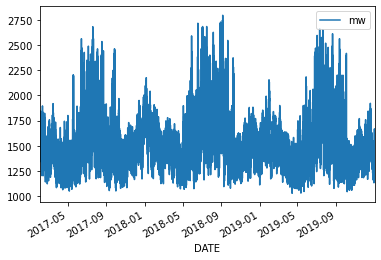

In [158]:
df_train.plot(x='DATE', y='mw')

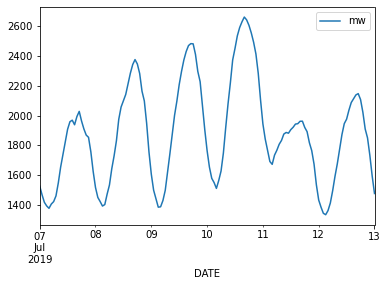

In [159]:
df_train[(df_train['DATE']>='2019-07-07') & (df_train['DATE']<='2019-07-13') ].plot(x='DATE',y='mw')

It seems better to normalize data to better compare patterns in temperature and energy

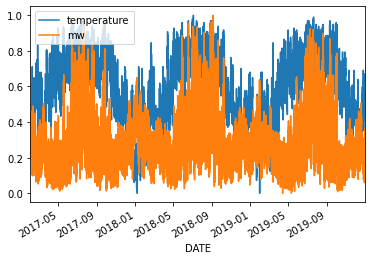

In [160]:
df_train_n=df_train.copy()
df_train_n['mw']=(df['mw']-df['mw'].min())/(df['mw'].max()-df['mw'].min())
df_train_n['temperature']=(df['temperature']-df['temperature'].min())/(df['temperature'].max()-df['temperature'].min())
ax1=df_train_n.plot(x='DATE', y='temperature')
df_train_n.plot(ax=ax1, x='DATE', y='mw')
plt.show()

One week in July...

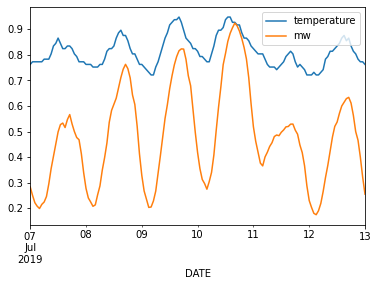

In [161]:
ax1=df_train_n[(df_train_n['DATE']>='2019-07-07') & (df_train_n['DATE']<='2019-07-13') ].plot(x='DATE',y='temperature')
df_train_n[(df_train_n['DATE']>='2019-07-07') & (df_train_n['DATE']<='2019-07-13') ].plot(ax=ax1,x='DATE',y='mw')

One week in January...

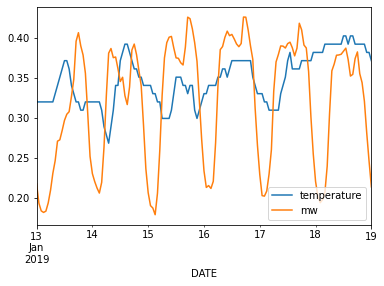

In [162]:
ax1=df_train_n[(df_train_n['DATE']>='2019-01-13') & (df_train_n['DATE']<='2019-01-19') ].plot(x='DATE',y='temperature')
df_train_n[(df_train_n['DATE']>='2019-01-13') & (df_train_n['DATE']<='2019-01-19') ].plot(ax=ax1,x='DATE',y='mw')

Correlation between temperature and energy

In [163]:
df_train['temperature'].corr(df['mw'])

0.3226148242075955

Scatterplot between temperature and energy

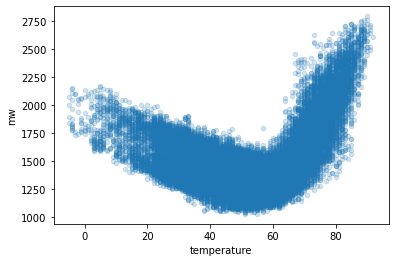

In [173]:
df_train.plot(kind='scatter',x='temperature',y='mw',alpha=0.2)